In [1]:
import numpy as np
import scipy

0a) Implement matrix-matrix multiplication, using for loops in python. You can assume that your matrices are represented as numpy arrays, but you may not use the numpy method for matrix multiplication. As a test, if you multiply the following two matrices, you should get the following result:

A = [[ 1.0, 4.5],

    [-2.1, 30.45]]

B = [[8.1, 2.3, 6.7],

    [-1.1, -200.1, 3.2]]

A . B = [[3.15, -898.15, 21.1],

       [-50.505, -6097.88, 83.37]]

In [2]:
def mat_mult_dumb(A, B):
    output = []
    for row in A:
        output.append([0 for i in range(len(B[0]))])
    # row and col loops determine the position in output matrix
    
    # row iterates over indicies in a given ROW of A
    for row in range(len(A[0])):
        # col iterates over column indicies of B
        for col in range(len(B)):
            
            row_col_sum = 0 
            for i in range(len(A[0])):
                # print('row:',row,'col:', col,'i:',i, A[row][i], B[i][col])
                row_col_sum += A[row][i] * B[i][col]
                    
            output[row][col] = row_col_sum

    return output

In [3]:
# test

A = [[ 1.0, 4.5],

    [-2.1, 30.45]]

B = [[8.1, 2.3, 6.7],

    [-1.1, -200.1, 3.2]]

AB = [[3.15, -898.15, 21.1],

       [-50.505, -6097.88, 83.37]]

In [4]:
len(B[0])

3

In [5]:
print('expected:', AB)
print('actual:  ', mat_mult_dumb(A, B))

expected: [[3.15, -898.15, 21.1], [-50.505, -6097.88, 83.37]]
actual:   [[3.1499999999999995, -898.15, 0], [-50.50500000000001, -6097.875, 0]]


0b) Implement a function vmap(f, X). vmap takes in a function f and a numpy array X. It should return a new array, F. F is the same size and shape as X, but each entry of F is filled with f(x), where x is the corresponding entry of X. You should write this method in a flexible way so that it handles arrays with more than two dimensions. One way to do this is through recursion. Here's pseudocode for that version:

In [6]:
def vmap(f, X):
    F = np.zeros(X.shape)
    # recursive case
    if(type(X) == np.ndarray):
        for i in range(len(X)):
             F[i] = vmap(f, X[i])
    # base case 
    else:
        return f(X)
    return F

In [7]:
def test_func(x):
    return x/2

In [8]:
# test
np.random.seed(1)
shape = (3,3,3,3)
X = np.random.randint(low=0, high=10, size=shape)
print(X)
print(vmap(test_func, X))

[[[[5 8 9]
   [5 0 0]
   [1 7 6]]

  [[9 2 4]
   [5 2 4]
   [2 4 7]]

  [[7 9 1]
   [7 0 6]
   [9 9 7]]]


 [[[6 9 1]
   [0 1 8]
   [8 3 9]]

  [[8 7 3]
   [6 5 1]
   [9 3 4]]

  [[8 1 4]
   [0 3 9]
   [2 0 4]]]


 [[[9 2 7]
   [7 9 8]
   [6 9 3]]

  [[7 7 4]
   [5 9 3]
   [6 8 0]]

  [[2 7 7]
   [9 7 3]
   [0 8 7]]]]
[[[[2.5 4.  4.5]
   [2.5 0.  0. ]
   [0.5 3.5 3. ]]

  [[4.5 1.  2. ]
   [2.5 1.  2. ]
   [1.  2.  3.5]]

  [[3.5 4.5 0.5]
   [3.5 0.  3. ]
   [4.5 4.5 3.5]]]


 [[[3.  4.5 0.5]
   [0.  0.5 4. ]
   [4.  1.5 4.5]]

  [[4.  3.5 1.5]
   [3.  2.5 0.5]
   [4.5 1.5 2. ]]

  [[4.  0.5 2. ]
   [0.  1.5 4.5]
   [1.  0.  2. ]]]


 [[[4.5 1.  3.5]
   [3.5 4.5 4. ]
   [3.  4.5 1.5]]

  [[3.5 3.5 2. ]
   [2.5 4.5 1.5]
   [3.  4.  0. ]]

  [[1.  3.5 3.5]
   [4.5 3.5 1.5]
   [0.  4.  3.5]]]]


1a) Create two 100 x 100 matrices of random numbers. Call these X and Y. One of these should be full of random floating point numbers (use np.random.random()), and the other should have random integers between 0 and 100 (use np.random.randint()).

In [9]:
X = np.random.random((100,100))
Y = np.random.randint(low=0, high=100, size=(100,100))

1b) Find the dot product X . Y, using your code from Problem 0a. Time how long it takes.

In [11]:
import time

In [16]:
start = time.time()
mat_mult_dumb(X, Y)
print(time.time() - start, 'seconds')

0.6095542907714844 seconds


1c) Find the dot product X . Y, using np. dot. Compare this time to the time you measured in 1b.

In [17]:
start = time.time()
np.dot(X,Y)
print(time.time() - start, 'seconds')

0.019514083862304688 seconds


1d) Time vmap(np.cos, X). Compare this time to how long it takes to do np.cos(X).

In [18]:
start = time.time()
vmap(np.cos, X)
print(time.time() - start, 'seconds')

0.019005775451660156 seconds


In [19]:
start = time.time()
np.cos(X)
print(time.time() - start, 'seconds')

0.000885009765625 seconds


1e) Find the eigenvalues of X, using any method from numpy or scipy.

In [23]:
np.linalg.eigvals(X)

array([49.85023169+0.j        ,  0.59736885+2.86417672j,
        0.59736885-2.86417672j,  2.87501792+0.j        ,
       -0.08042511+2.78442563j, -0.08042511-2.78442563j,
        1.30677751+2.36939507j,  1.30677751-2.36939507j,
        2.11539959+1.61069964j,  2.11539959-1.61069964j,
       -1.56473952+2.13501057j, -1.56473952-2.13501057j,
       -2.41608686+1.04418771j, -2.41608686-1.04418771j,
       -2.16692972+1.42403744j, -2.16692972-1.42403744j,
       -2.48858604+0.57030311j, -2.48858604-0.57030311j,
        2.56436036+0.j        ,  1.51869749+1.98937794j,
        1.51869749-1.98937794j,  2.3922669 +0.50823994j,
        2.3922669 -0.50823994j,  0.49329519+2.39871526j,
        0.49329519-2.39871526j,  2.03796425+1.19441149j,
        2.03796425-1.19441149j,  1.06374136+2.10027497j,
        1.06374136-2.10027497j, -0.250444  +2.31636937j,
       -0.250444  -2.31636937j, -0.59433431+2.28002857j,
       -0.59433431-2.28002857j, -1.44719921+1.86517806j,
       -1.44719921-1.86517806j,

In [24]:
len(np.linalg.eigvals(X))

100

2a) Write a method that takes in array dimensions L and W, and a number, r, between 0 and 1. Your method should produce a L x W random numpy array with some filled entries and some zero entries. The fraction of full entries (the "density") should be approximately r - obviously, since there are a fixed number of entries in the array, not every fraction r is achievable.

In [49]:
def build_sparse(L, W, r):
    rand_sparse = np.zeros((L, W))
    non_zero_indicies = np.random.choice(L * W, int(r * L * W), replace=False)
    for i in range(len(non_zero_indicies)):
        row = int(non_zero_indicies[i]/W)
        col = non_zero_indicies[i] % W
        rand_sparse[row][col] = float(np.random.random((1,)))
    return rand_sparse

In [50]:
build_sparse(10, 10, .1)

array([[0.99281103, 0.        , 0.78817412, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.75954829, 0.        ,
        0.        , 0.        , 0.        , 0.30285146, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.17201437, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.48817535, 0.17128434, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.43863448, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.36069121, 0.        , 0.       

2b) Use your method to generate a 50% full 256x256 array. Convert this array to a scipy sparse array.

In [52]:
from scipy import sparse

In [51]:
arr = build_sparse(256, 256, 0.5)

In [53]:
sArr = sparse.csr_matrix(arr)

2c) Generate another 50% full 256x256 array, and convert it as well.

In [56]:
arr2 = build_sparse(256, 256, 0.5)
sArr2 = sparse.csr_matrix(arr2)

2d) Matrix multiply these two arrays. Time how long matrix multiplication for both the sparse and dense versions of these arrays.

In [64]:
start = time.time()
np.dot(arr, arr2)
print(time.time() - start, 'seconds')

0.001447916030883789 seconds


In [65]:
start = time.time()
sArr.multiply(sArr2)
print(time.time() - start, 'seconds')

0.0011069774627685547 seconds


2e) Repeat 2b-2d with many different densities. Make a plot of density vs. time for both types of matrix multiplication. At what density do sparse arrays stop being more efficient?

In [71]:
density_list = np.arange(0.01, 1.00, 0.01)

In [79]:
dense_time = []
sparse_time = []
for i in range(len(density_list)):
    arr1 = build_sparse(256, 256, density_list[i])
    arr2 = build_sparse(256, 256, density_list[i])
    
    start = time.time()
    np.dot(arr1, arr2)
    dense_time.append(time.time() - start)
    
    s_arr1 = sparse.csr_matrix(arr1)
    s_arr2 = sparse.csr_matrix(arr2)
    
    start = time.time()
    s_arr1.multiply(s_arr2)
    sparse_time.append(time.time() - start)
    
    

In [77]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'time for matmult')

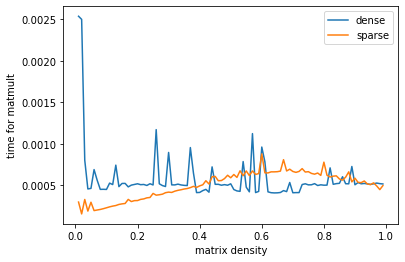

In [84]:
plt.plot(density_list, dense_time, label='dense')
plt.plot(density_list, sparse_time, label='sparse')
plt.legend()
plt.xlabel('matrix density')
plt.ylabel('time for matmult')